### Selecionando os dados de comandantes

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Função para buscar dados da API do Scryfall
def fetch_all_data(query):
    url = f"https://api.scryfall.com/cards/search?{query}"
    response = requests.get(url)
    if response.status_code != 200:
        return []

    data = response.json()
    cards = data['data']

    while data.get('has_more'):
        next_page_url = data['next_page']
        response = requests.get(next_page_url)
        if response.status_code != 200:
            break
        data = response.json()
        cards.extend(data['data'])

    return cards

# Buscar todas as cartas de comandante
# query = "q=is:commander"
query = "q=is:commander"

cards = fetch_all_data(query)

# Convertendo para DataFrame
df = pd.DataFrame(cards)

In [2]:
len(df)

2331

In [3]:
df['keywords']

0               [Venture into the dungeon]
1                           [Scry, Flying]
2       [Mark of Chaos Ascendant, Trample]
3                    [Choose a background]
4                      [Vigilance, Menace]
                       ...                
2326                       [Flying, Haste]
2327                                [Dash]
2328                               [Haste]
2329                              [Flying]
2330                                    []
Name: keywords, Length: 2331, dtype: object

In [4]:
df.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'arena_id', 'name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'all_parts', 'legalities', 'games', 'reserved', 'foil',
       'nonfoil', 'finishes', 'oversized', 'promo', 'reprint', 'variation',
       'set_id', 'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'card_back_id', 'artist',
       'artist_ids', 'illustration_id', 'border_color', 'frame',
       'security_stamp', 'full_art', 'textless', 'booster', 'story_spotlight',
       'promo_types', 'prices', 'related_uris', 'card_faces', 'mtgo_id',
       'tcgplayer_id', 'cardmarket_id', 'flavor_text', 'frame_effects',
       'edhrec_rank', 'purchase_uris', 'preview', 

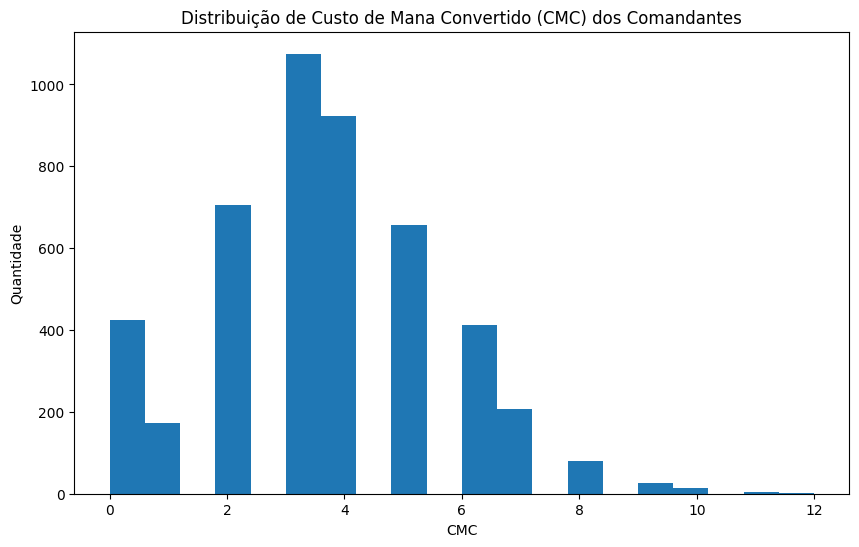

In [62]:
# Histograma para Distribuição de CMC
df['cmc'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribuição de Custo de Mana Convertido (CMC) dos Comandantes')
plt.xlabel('CMC')
plt.ylabel('Quantidade')
plt.show()



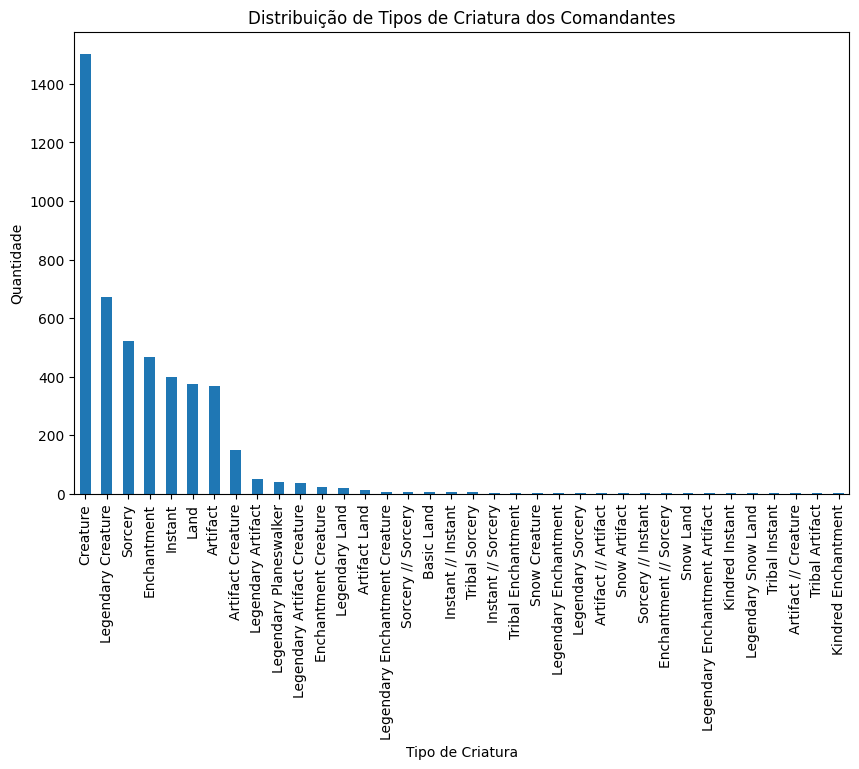

In [63]:
# Gráfico de Barras para Tipos de Criatura
df['main_type'] = df['type_line'].apply(lambda x: x.split('—')[0].strip())
type_counts = df['main_type'].value_counts()
type_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Tipos de Criatura dos Comandantes')
plt.xlabel('Tipo de Criatura')
plt.ylabel('Quantidade')
plt.show()



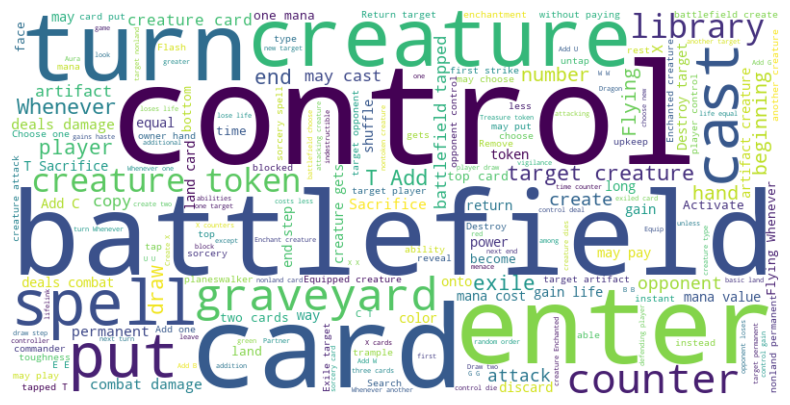

In [64]:
# Nuvem de Palavras para texto carta
all_text = ' '.join(df['oracle_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

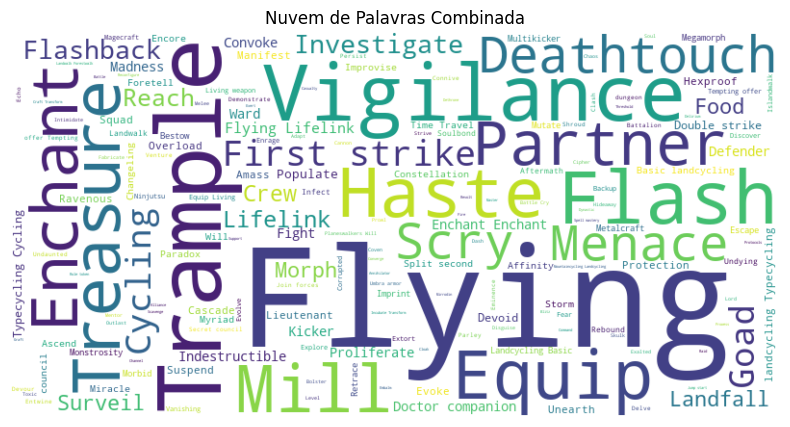

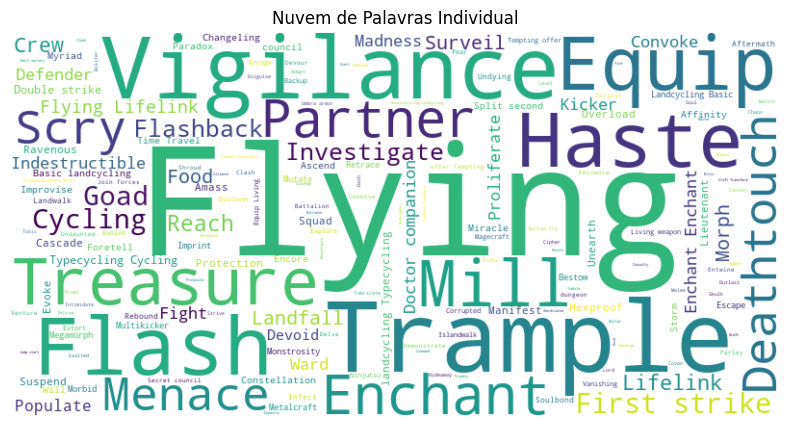

In [65]:


# Combinar todas as palavras-chave em uma única string para a nuvem de palavras combinada
all_keywords_combined = ' '.join([' '.join(keywords) for keywords in df['keywords']])

# Criar uma string com cada palavra-chave individualmente para a nuvem de palavras de módulos individuais
individual_keywords = ' '.join([keyword for keywords in df['keywords'] for keyword in keywords])

# Gerar a nuvem de palavras combinada
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(all_keywords_combined)

# Gerar a nuvem de palavras individual
wordcloud_individual = WordCloud(width=800, height=400, background_color='white').generate(individual_keywords)

# Plotar a nuvem de palavras combinada
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Combinada')
plt.show()

# Plotar a nuvem de palavras individual
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_individual, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Individual')
plt.show()


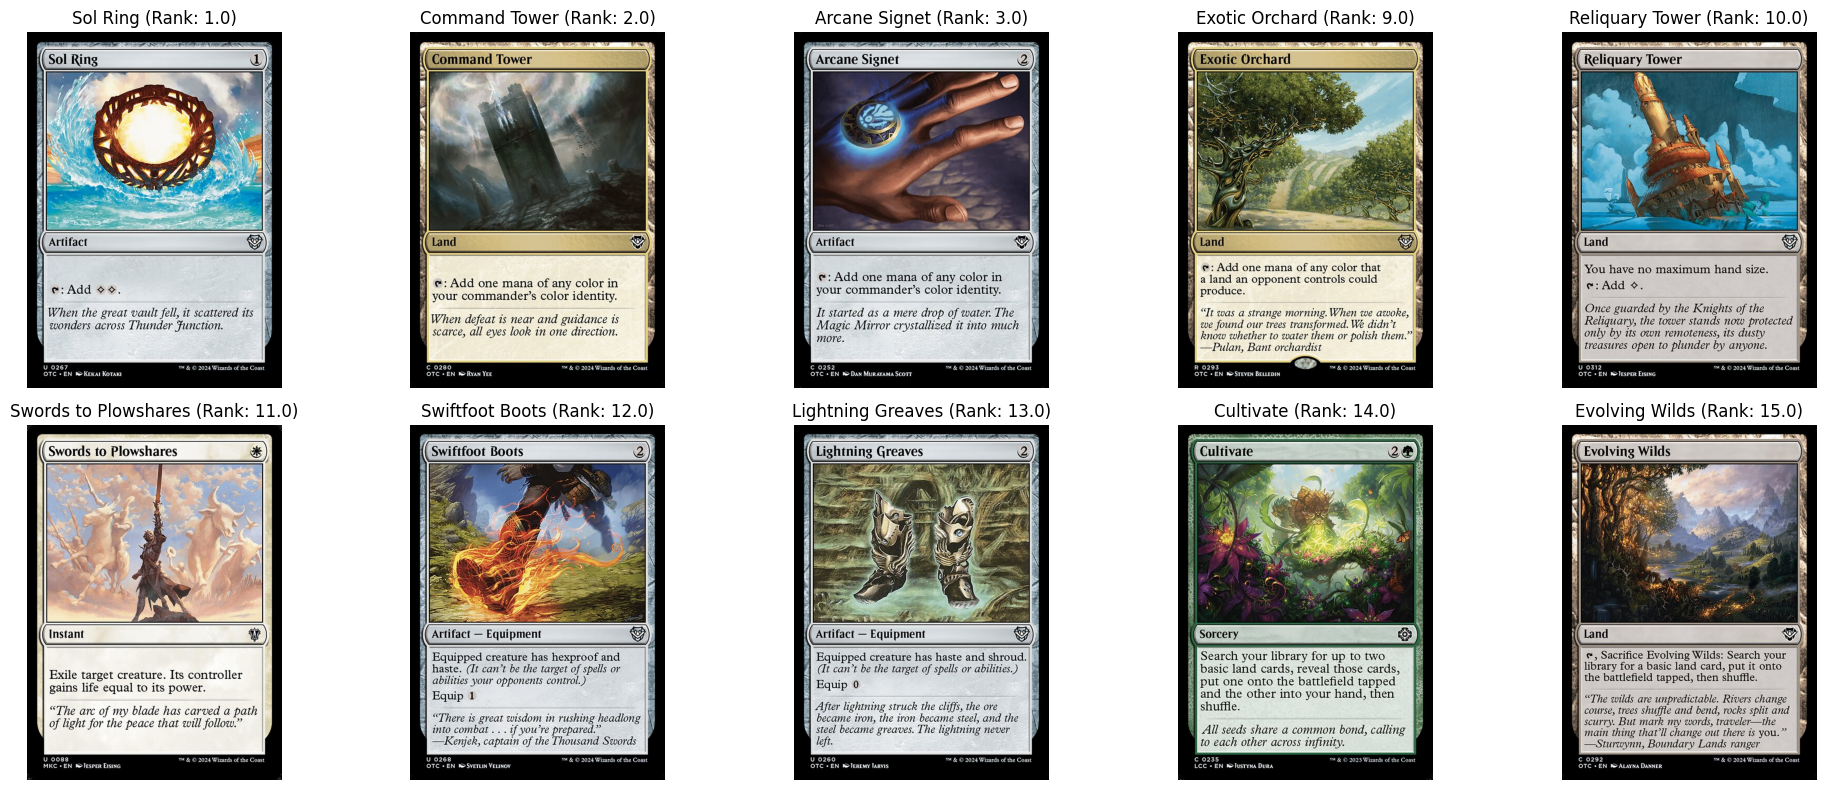

In [66]:
# Filtrar e ordenar pelo rank do EDHREC
df = df[df['edhrec_rank'].notnull()]  # Filtrar cartas sem rank EDHREC
df = df.sort_values('edhrec_rank').head(10)  # Top 10 cartas

# Mostrar imagens das cartas
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (index, row) in enumerate(df.iterrows()):
    image_uris = row['image_uris']
    if isinstance(image_uris, dict):
        img_url = image_uris.get('normal')
        if img_url:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"{row['name']} (Rank: {row['edhrec_rank']})", fontsize=12)
        else:
            axes[i].axis('off')
            axes[i].set_title(f"{row['name']} (Rank: {row['edhrec_rank']})\nImagem não disponível", fontsize=12)
    else:
        axes[i].axis('off')
        axes[i].set_title(f"{row['name']} (Rank: {row['edhrec_rank']})\nImagem não disponível", fontsize=12)

plt.tight_layout()
plt.show()

# Mostrar DataFrame dos top 10 comandantes
# df_top_10 = df[['name', 'edhrec_rank', 'image_uris']]
# print(df_top_10)

In [67]:
edhrec_data

{}